## Final Project Submission

Please fill out:
* Student name: Jillian Clark, Yuhkai Lin, John Sheehan
* Student pace: full time
* Scheduled project review date/time: 6/3/2022
* Instructor name: William and Daniel


## Buisness Understanding

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os
import sqlite3

## Data Understanding

In [4]:
import sqlite3
import pandas as pd
import zipfile

# Extract IMDb SQL .db file
with zipfile.ZipFile('./zippedData/im.db.zip') as zipObj:
    # Extract all contents of .zip file into current directory
    zipObj.extractall(path='./zippedData/')
    
# Create connection to IMDb DB
con = sqlite3.connect('./zippedData/im.db')

In [5]:
#import data from rt.movie_info.tsv.gz
movie_info = pd.read_csv('./zippedData/rt.movie_info.tsv.gz',sep="\t")

In [6]:
#rt.reviews.tsv.gz
reviews = pd.read_csv('./zippedData/rt.reviews.tsv.gz',sep="\t", encoding = 'unicode_escape')

In [7]:
#bom.movie_gross.csv.gz
movie_gross = pd.read_csv('./zippedData/bom.movie_gross.csv.gz')

In [8]:
#tmdb.movies.csv.gz
tmdb = pd.read_csv('./zippedData/tmdb.movies.csv.gz')

In [9]:
#tn.movie_budgets.csv.gz
budgets = pd.read_csv('./zippedData/tn.movie_budgets.csv.gz')

In [10]:
movie_ratings = """
SELECT *
FROM movie_ratings
"""

pd.read_sql(movie_ratings, con)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [11]:
pd.read_sql(movie_ratings, con).describe()


,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [12]:
q1 = """
SELECT *
FROM movie_ratings
JOIN movie_basics
    ON movie_ratings.movie_id = movie_basics.movie_id
ORDER BY averagerating DESC

"""

pd.read_sql(q1, con)

,movie_id,averagerating,numvotes,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt5390098,10.0,5,tt5390098,The Paternal Bond: Barbary Macaques,Atlas Mountain: Barbary Macaques - Childcaring...,2015,59.0,Documentary
1,tt6295832,10.0,5,tt6295832,Requiem voor een Boom,Requiem voor een Boom,2016,48.0,Documentary
2,tt1770682,10.0,5,tt1770682,Freeing Bernie Baran,Freeing Bernie Baran,2010,100.0,"Crime,Documentary"
3,tt2632430,10.0,5,tt2632430,Hercule contre Hermès,Hercule contre Hermès,2012,72.0,Documentary
4,tt8730716,10.0,5,tt8730716,Pick It Up! - Ska in the '90s,Pick It Up! - Ska in the '90s,2019,99.0,Documentary
...,...,...,...,...,...,...,...,...,...
73851,tt7926296,1.0,17,tt7926296,Nakhodka interneta,Nakhodka interneta,2017,162.0,Drama
73852,tt3235258,1.0,510,tt3235258,My First Love,Hatsukoi,2013,82.0,Drama
73853,tt7831076,1.0,96,tt7831076,"Yes, Sir! 7","Yes, Sir! 7",2016,111.0,"Comedy,Drama"
73854,tt3262718,1.0,223,tt3262718,Bye Bye Marrano,Bye Bye Marrano,2013,114.0,Drama


Joining movie basics and movie ratings tables to be able to compare movie gernes with ratings.

## Data Analysis 

Here we clean and analyze our data to help make our recomendations. 

In [13]:
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [14]:
#Examining movie_gross for nulls
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


The data in movie_gross stores foreign_gross as an object data type. 

In [15]:
#drop rows containing nulls in foreign_gross column
movie_gross_clean= movie_gross.dropna(subset=['foreign_gross'])

In [16]:
#change foreign_gross into a float type
movie_gross_clean['foreign_gross'] = movie_gross_clean['foreign_gross'].str.replace(",","").astype(float)
movie_gross_clean.head()

<ipython-input-16-261fdcc9ccea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_gross_clean['foreign_gross'] = movie_gross_clean['foreign_gross'].str.replace(",","").astype(float)


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


In [17]:
#Examining tmdb data for nulls
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [18]:
tmdb.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [19]:
#create a new column 'release_month' (string) with just the month 
tmdb['release_month'] = tmdb['release_date'].str[5:7]
tmdb.head()


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,release_month
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,11
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,03
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,05
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,11
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,07


In [20]:
grouped_tmdb = tmdb.groupby('release_month')
grouped_tmdb.mean()

,Unnamed: 0,id,popularity,vote_average,vote_count
release_month,,,,,
01,12421.901980,289163.437101,2.180176,5.866762,65.612388
02,13681.524783,284874.361834,3.352600,5.958240,189.337670
03,14003.534497,289719.502909,3.052933,6.042810,168.189942
04,13902.661341,296493.706937,2.784293,6.117537,120.299299
05,13458.068633,293177.639678,3.123663,6.003539,230.502413
06,13376.954755,293923.416898,3.043683,6.067959,203.485688
07,13026.402261,291002.682846,3.585265,5.883710,304.916223
08,13138.877503,295222.210247,3.580677,5.908539,187.911661
09,13049.484099,296616.382067,3.265490,5.955300,167.389134


In [21]:
#examining the popularity statistics
grouped_tmdb['popularity'].describe()

,count,mean,std,min,25%,50%,75%,max
release_month,,,,,,,,
01,3132.0,2.180176,2.974335,0.6,0.60000,0.8830,2.17800,28.138
02,1614.0,3.352600,4.304551,0.6,0.62400,1.5130,4.55400,45.253
03,2406.0,3.052933,3.931685,0.6,0.60000,1.4000,3.77100,45.000
04,2566.0,2.784293,3.783140,0.6,0.60000,1.2410,3.25175,80.773
05,1865.0,3.123663,4.683931,0.6,0.60000,1.3470,3.59900,50.289
06,2166.0,3.043683,4.236429,0.6,0.60000,1.3565,3.38750,36.286
07,1504.0,3.585265,4.990946,0.6,0.62875,1.4000,4.77250,46.775
08,1698.0,3.580677,4.426682,0.6,0.60000,1.6020,5.42175,49.606
09,2264.0,3.265490,4.136450,0.6,0.60150,1.4000,4.38850,36.955


In [22]:
grouped_tmdb['popularity'].mean()

release_month
01    2.180176
02    3.352600
03    3.052933
04    2.784293
05    3.123663
06    3.043683
07    3.585265
08    3.580677
09    3.265490
10    3.081957
11    3.459795
12    3.922681
Name: popularity, dtype: float64

In [23]:
#looking for nulls in budgets 
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [24]:
budgets.head()
#important metrics: domestic_gross, wordwide_gross, production_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [25]:
#function to remove the dollar sign and change value from string to a float

def money_string_to_float(df, column_name):
    df[column_name] = df[column_name].str[1:]
    df[column_name] = df[column_name].str.replace(',', '').astype(float)
    return df

money_string_to_float(budgets, "production_budget")
money_string_to_float(budgets, "domestic_gross")
money_string_to_float(budgets, "worldwide_gross")

budgets.head()
#do not run this again (write an exception)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [26]:
#create a new column foreign_gross that is the difference between worldwide_gross and domestic_gross
budgets['foreign_gross'] = budgets['worldwide_gross'] - budgets['domestic_gross']
#sort by foreign_gross descending
budgets['foreign_gross'].sort_values(ascending=False)
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.015838e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.046000e+08
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.070000e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,9.440081e+08
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,6.965404e+08


In [27]:
#add another column to budgets 'release_month'
budgets['release_month'] = budgets['release_date'].str[0:3]
budgets.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,release_month
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.0,0.0,Dec
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,240495.0,192013.0,Apr
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1338.0,0.0,Jul
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.0,0.0,Sep
5781,82,"Aug 5, 2005",My Date With Drew,1100.0,181041.0,181041.0,0.0,Aug


There are some 0 values for domestic_gross and worldwide_gross. We want only movies that actually produced sales.

In [28]:
#how many instances of $0 do we have in our gross columns?
gross_zero = budgets[budgets['worldwide_gross'] == 0]
gross_zero.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367 entries, 194 to 5780
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 367 non-null    int64  
 1   release_date       367 non-null    object 
 2   movie              367 non-null    object 
 3   production_budget  367 non-null    float64
 4   domestic_gross     367 non-null    float64
 5   worldwide_gross    367 non-null    float64
 6   foreign_gross      367 non-null    float64
 7   release_month      367 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 25.8+ KB


In [29]:
budgets_clean = budgets.drop(budgets[budgets['worldwide_gross'] == 0].index)
budgets_clean.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,release_month
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.015838e+09,Dec
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.046000e+08,May
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.070000e+08,Jun
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,9.440081e+08,May
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,6.965404e+08,Dec


Let's try grouping our data by release_month:

In [30]:
budgets_month = budgets_clean.groupby('release_month')
budgets_month.mean()

,id,production_budget,domestic_gross,worldwide_gross,foreign_gross
release_month,,,,,
Apr,51.348730,2.479273e+07,2.865379e+07,6.282632e+07,3.417253e+07
Aug,52.344609,2.645859e+07,3.373241e+07,6.394353e+07,3.021112e+07
Dec,50.156200,3.823086e+07,5.530613e+07,1.219991e+08,6.669292e+07
Feb,50.651351,2.919364e+07,3.752039e+07,7.579852e+07,3.827814e+07
Jan,49.591463,2.178006e+07,2.533694e+07,4.926112e+07,2.392418e+07
Jul,49.884434,4.401758e+07,6.301966e+07,1.462830e+08,8.326333e+07
Jun,50.104575,4.484185e+07,6.869623e+07,1.487332e+08,8.003695e+07
Mar,49.822727,3.267950e+07,4.120296e+07,8.613110e+07,4.492814e+07
May,50.358779,4.868485e+07,6.907396e+07,1.680485e+08,9.897459e+07


The data is grouped by month, but we'd like to have this in chronological order. The months are stored as strings of the abbreviated month name. In order to sort the data by chronological release month, we added another column associating the release_month with the number of that month.

In [31]:
#create a new column 'month_number'
months_dict = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}

month_num_list=[]
for month in budgets_clean['release_month']:
    month_num = months_dict[month] 
    month_num_list.append(month_num)
budgets_clean['month_number'] = month_num_list
budgets_clean.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,release_month,month_number
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.015838e+09,Dec,12
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.046000e+08,May,5
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.070000e+08,Jun,6
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,9.440081e+08,May,5
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,6.965404e+08,Dec,12


Now we can group the 'budgets' dataframe by 'month_number' and take a look at some aggregation statistics for budget and gross.

In [32]:
#group by the month_number
budgets_month = budgets_clean.groupby('month_number')
budgets_month.mean()

,id,production_budget,domestic_gross,worldwide_gross,foreign_gross
month_number,,,,,
1,49.591463,2.178006e+07,2.533694e+07,4.926112e+07,2.392418e+07
2,50.651351,2.919364e+07,3.752039e+07,7.579852e+07,3.827814e+07
3,49.822727,3.267950e+07,4.120296e+07,8.613110e+07,4.492814e+07
4,51.348730,2.479273e+07,2.865379e+07,6.282632e+07,3.417253e+07
5,50.358779,4.868485e+07,6.907396e+07,1.680485e+08,9.897459e+07
6,50.104575,4.484185e+07,6.869623e+07,1.487332e+08,8.003695e+07
7,49.884434,4.401758e+07,6.301966e+07,1.462830e+08,8.326333e+07
8,52.344609,2.645859e+07,3.373241e+07,6.394353e+07,3.021112e+07
9,48.381974,2.272352e+07,2.449119e+07,4.939912e+07,2.490793e+07


Here is some exploration of the gross columns for all three categories: domestic, worldwide, and foreign.

In [33]:
budgets_month['domestic_gross'].describe()

,count,mean,std,min,25%,50%,75%,max
month_number,,,,,,,,
1,328.0,2.533694e+07,2.867713e+07,0.0,2380013.00,16204811.0,3.827525e+07,146336178.0
2,370.0,3.752039e+07,5.746583e+07,0.0,4050716.75,20267527.5,5.032184e+07,700059566.0
3,440.0,4.120296e+07,6.250563e+07,0.0,3484683.75,18733294.5,5.275792e+07,504014165.0
4,433.0,2.865379e+07,5.248817e+07,0.0,1224330.00,14249005.0,3.628070e+07,678815482.0
5,393.0,6.907396e+07,1.016921e+08,0.0,2956000.00,21540363.0,9.138720e+07,623279547.0
6,459.0,6.869623e+07,9.156077e+07,0.0,5007814.00,38311134.0,1.012066e+08,652270625.0
7,424.0,6.301966e+07,8.152030e+07,0.0,5768193.50,33034174.5,8.901194e+07,533720947.0
8,473.0,3.373241e+07,4.587340e+07,0.0,3100000.00,19184820.0,4.472664e+07,333172112.0
9,466.0,2.449119e+07,3.351091e+07,0.0,1490118.00,12799007.0,3.504984e+07,327481748.0


In [34]:
budgets_month['worldwide_gross'].describe()

,count,mean,std,min,25%,50%,75%,max
month_number,,,,,,,,
1,328.0,4.926112e+07,6.691056e+07,673.0,4261841.75,24843762.0,7.068974e+07,5.175991e+08
2,370.0,7.579852e+07,1.238435e+08,3604.0,7929280.00,37849452.0,8.645606e+07,1.348258e+09
3,440.0,8.613110e+07,1.552561e+08,3234.0,7282899.00,28711776.5,9.263332e+07,1.259200e+09
4,433.0,6.282632e+07,1.616966e+08,527.0,4023741.00,22910563.0,6.417045e+07,2.048134e+09
5,393.0,1.680485e+08,2.595341e+08,528.0,6244618.00,35681080.0,2.550000e+08,1.517936e+09
6,459.0,1.487332e+08,2.258933e+08,1217.0,9401650.00,54876855.0,2.153745e+08,1.648855e+09
7,424.0,1.462830e+08,2.192839e+08,1338.0,10764080.75,58978298.0,1.748570e+08,1.341693e+09
8,473.0,6.394353e+07,9.897115e+07,401.0,5617460.00,26887177.0,8.068118e+07,7.708675e+08
9,466.0,4.939912e+07,7.634508e+07,1822.0,4244109.25,22336591.0,5.838477e+07,6.974580e+08


Minimum values of 0 in foreign gross tell us that some movies only had domestic sales.

In [35]:
budgets_month['foreign_gross'].describe()

,count,mean,std,min,25%,50%,75%,max
month_number,,,,,,,,
1,328.0,2.392418e+07,4.849461e+07,0.0,0.00,2709992.0,2.862173e+07,3.740705e+08
2,370.0,3.827814e+07,7.601360e+07,0.0,1657.00,8610522.0,4.084868e+07,6.481987e+08
3,440.0,4.492814e+07,9.786655e+07,0.0,8789.00,8584576.0,4.200565e+07,7.551855e+08
4,433.0,3.417253e+07,1.143279e+08,0.0,0.00,4615682.0,2.700038e+07,1.369319e+09
5,393.0,9.897459e+07,1.648751e+08,0.0,47469.00,11999999.0,1.382581e+08,9.440081e+08
6,459.0,8.003695e+07,1.422974e+08,0.0,54199.50,13556787.0,1.056281e+08,9.965842e+08
7,424.0,8.326333e+07,1.456406e+08,0.0,97116.75,19312855.5,9.546976e+07,9.605000e+08
8,473.0,3.021112e+07,5.933793e+07,0.0,0.00,3467655.0,3.433392e+07,4.376954e+08
9,466.0,2.490793e+07,4.857892e+07,0.0,12606.00,5310087.0,2.924530e+07,3.699762e+08


In [36]:
#take a look at the budgets_month dataframe with all of our added columns
budgets_month.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,release_month,month_number
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.015838e+09,Dec,12
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.046000e+08,May,5
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.070000e+08,Jun,6
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,9.440081e+08,May,5
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,6.965404e+08,Dec,12
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,1.116649e+09,Dec,12
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.369319e+09,Apr,4
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000.0,309420425.0,9.634204e+08,6.540000e+08,May,5
8,9,"Nov 17, 2017",Justice League,300000000.0,229024295.0,6.559452e+08,4.269209e+08,Nov,11
9,10,"Nov 6, 2015",Spectre,300000000.0,200074175.0,8.796209e+08,6.795467e+08,Nov,11


The budgets/gross data encompasses a wide range of years. To hone in on more recent market trends, we limited the range of years to the last 25 years.

In [37]:
#create a new column 'release_year' that contains the year as an int
#take a look at the data to find the oldest movie and most recent movie
budgets_clean['release_year'] = budgets_clean['release_date'].str[-4:].astype(int)
budgets_clean['release_year'].describe()

count    5415.000000
mean     2003.599446
std        12.546965
min      1915.000000
25%      1999.000000
50%      2006.000000
75%      2012.000000
max      2019.000000
Name: release_year, dtype: float64

In [38]:
budgets_clean = budgets_clean.sort_values('release_year')
budgets_clean

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,release_month,month_number,release_year
5677,78,"Feb 8, 1915",The Birth of a Nation,110000.0,10000000.0,11000000.0,1000000.0,Feb,2,1915
5614,15,"Dec 24, 1916","20,000 Leagues Under the Sea",200000.0,8000000.0,8000000.0,0.0,Dec,12,1916
5683,84,"Sep 17, 1920",Over the Hill to the Poorhouse,100000.0,3000000.0,3000000.0,0.0,Sep,9,1920
4569,70,"Dec 30, 1925",Ben-Hur: A Tale of the Christ,3900000.0,9000000.0,9000000.0,0.0,Dec,12,1925
5606,7,"Nov 19, 1925",The Big Parade,245000.0,11000000.0,22000000.0,11000000.0,Nov,11,1925
...,...,...,...,...,...,...,...,...,...,...
1176,77,"Apr 12, 2019",Hellboy,50000000.0,21903748.0,40725492.0,18821744.0,Apr,4,2019
3835,36,"Jan 16, 2019",Dragon Ball Super: Broly,8500000.0,30376755.0,122747755.0,92371000.0,Jan,1,2019
496,97,"Apr 5, 2019",Shazam!,85000000.0,139606856.0,362899733.0,223292877.0,Apr,4,2019
3777,78,"Feb 13, 2019",Happy Death Day 2U,9000000.0,28051045.0,64179495.0,36128450.0,Feb,2,2019


The most recent movie released in 2019, and the oldest movie released in 1915. We can subset our 'budgets_clean' dataframe to work with movies from the last 25 years. 

In [39]:
#create a subset containing movies released in the last 25 years
budgets_recent = budgets_clean[budgets_clean['release_year'] >= 1997]
budgets_recent.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,release_month,month_number,release_year
3397,98,"Aug 6, 1997",Def Jam's How To Be a Player,12000000.0,14010363.0,1.401036e+07,0.000000e+00,Aug,8,1997
4589,90,"Aug 13, 1997",The Full Monty,3500000.0,45950122.0,2.612494e+08,2.152993e+08,Aug,8,1997
1135,36,"Feb 14, 1997",Absolute Power,50000000.0,50068310.0,5.006831e+07,0.000000e+00,Feb,2,1997
42,43,"Dec 19, 1997",Titanic,200000000.0,659363944.0,2.208208e+09,1.548844e+09,Dec,12,1997
1647,48,"Sep 19, 1997",In & Out,35000000.0,63826569.0,8.322657e+07,1.940000e+07,Sep,9,1997


With this recent release data subset, we can focus our analysis to provide recommendations based on modern movie productions.

In [40]:
budgets_recent_grouped = budgets_recent.groupby('month_number')
budgets_recent_grouped.mean()

,id,production_budget,domestic_gross,worldwide_gross,foreign_gross,release_year
month_number,,,,,,
1,50.778195,2.485784e+07,2.746353e+07,5.684433e+07,2.938080e+07,2008.898496
2,50.498403,3.201040e+07,3.903213e+07,8.234195e+07,4.330982e+07,2008.530351
3,50.172775,3.565175e+07,4.183567e+07,9.013388e+07,4.829821e+07,2008.149215
4,50.384817,2.672459e+07,3.005665e+07,6.778824e+07,3.773159e+07,2008.057592
5,49.414557,5.526434e+07,7.182751e+07,1.806778e+08,1.088503e+08,2008.259494
6,50.023188,5.085091e+07,6.800196e+07,1.560863e+08,8.808437e+07,2008.188406
7,49.578947,4.829000e+07,6.502817e+07,1.568013e+08,9.177312e+07,2007.850877
8,52.733503,2.910880e+07,3.508588e+07,6.919715e+07,3.411127e+07,2007.459391
9,48.431373,2.383433e+07,2.408086e+07,5.048054e+07,2.639968e+07,2007.909314


In [41]:
budgets_recent_grouped.median()

,id,production_budget,domestic_gross,worldwide_gross,foreign_gross,release_year
month_number,,,,,,
1,48.0,19000000.0,18504178.5,34035337.5,10799881.0,2009.0
2,48.0,22000000.0,22958583.0,43528634.0,13148626.0,2008.0
3,51.0,20000000.0,18626949.0,29437906.0,10216031.5,2008.0
4,51.0,18000000.0,14250917.5,23910786.0,6255147.0,2008.0
5,48.5,21500000.0,21506024.0,38166202.5,14011502.5,2008.5
6,49.0,27000000.0,32267774.0,55443032.0,20110271.0,2008.0
7,49.0,25500000.0,32187940.5,65710949.0,23726380.5,2008.0
8,51.0,20000000.0,19585998.5,32957655.5,7759159.5,2008.0
9,46.0,18000000.0,12295033.0,22903867.0,7075485.5,2008.0


In [42]:
pd.read_sql(q1, con).describe()

,averagerating,numvotes,start_year,runtime_minutes
count,73856.000000,7.385600e+04,73856.000000,66236.000000
mean,6.332729,3.523662e+03,2014.276132,94.654040
std,1.474978,3.029402e+04,2.614807,208.574111
min,1.000000,5.000000e+00,2010.000000,3.000000
25%,5.500000,1.400000e+01,2012.000000,81.000000
50%,6.500000,4.900000e+01,2014.000000,91.000000
75%,7.400000,2.820000e+02,2016.000000,104.000000
max,10.000000,1.841066e+06,2019.000000,51420.000000


Looking at the mean and median for number of votes. I used this as a way to eliminate movies with so few votes. I utilized the median number of votes to filter (49) due to large range in data. I decided to look at the top 50 and bottom 50 rated films to see which genres were most represented in the highest and lowest rated films.



In [43]:
q2 = """
SELECT genres
FROM movie_basics
LEFT JOIN movie_ratings
    ON movie_basics.movie_id = movie_ratings.movie_id
WHERE numvotes > 49
ORDER BY averagerating ASC
LIMIT 50

"""
pd.read_sql(q2, con) 

##selecting 50 lowest rated movies with over 49 votes

,genres
0,"Drama,Romance"
1,Drama
2,Comedy
3,"Fantasy,Mystery,Romance"
4,Horror
5,"Adventure,Animation,Family"
6,None
7,Drama
8,Horror
9,Drama


In [44]:
bottom_genres = pd.read_sql(q2, con) 

In [45]:
bottom_genres

,genres
0,"Drama,Romance"
1,Drama
2,Comedy
3,"Fantasy,Mystery,Romance"
4,Horror
5,"Adventure,Animation,Family"
6,None
7,Drama
8,Horror
9,Drama


In [46]:
bottom_genres_split= bottom_genres.genres.str.split(',')

Splitting the columns that have multiple genres by "," so that each genre can be counted individually.

In [47]:
bottom_genres_split

0                   [Drama, Romance]
1                            [Drama]
2                           [Comedy]
3        [Fantasy, Mystery, Romance]
4                           [Horror]
5     [Adventure, Animation, Family]
6                               None
7                            [Drama]
8                           [Horror]
9                            [Drama]
10                          [Comedy]
11                           [Drama]
12           [Action, Drama, Horror]
13                           [Drama]
14                       [Adventure]
15    [Adventure, Biography, Comedy]
16                     [Documentary]
17                          [Family]
18                   [Drama, Family]
19                          [Comedy]
20                   [Comedy, Drama]
21                          [Comedy]
22                         [Romance]
23                           [Drama]
24                           [Drama]
25                          [Comedy]
26                   [Comedy, Drama]
2

In [48]:
bottom_genres_split.drop(labels=[6], inplace=True)


Dropping the row that does not have a genre listed.

In [49]:
bottom_genres_split

0                   [Drama, Romance]
1                            [Drama]
2                           [Comedy]
3        [Fantasy, Mystery, Romance]
4                           [Horror]
5     [Adventure, Animation, Family]
7                            [Drama]
8                           [Horror]
9                            [Drama]
10                          [Comedy]
11                           [Drama]
12           [Action, Drama, Horror]
13                           [Drama]
14                       [Adventure]
15    [Adventure, Biography, Comedy]
16                     [Documentary]
17                          [Family]
18                   [Drama, Family]
19                          [Comedy]
20                   [Comedy, Drama]
21                          [Comedy]
22                         [Romance]
23                           [Drama]
24                           [Drama]
25                          [Comedy]
26                   [Comedy, Drama]
27                          [Horror]
2

In [50]:
q3 = """
SELECT genres
FROM movie_basics
LEFT JOIN movie_ratings
    ON movie_basics.movie_id = movie_ratings.movie_id
AND numvotes > 49
ORDER BY averagerating DESC
LIMIT 50

"""
pd.read_sql(q3, con) 

##selecting 50 highest rated movies with over 49 votes

,genres
0,Drama
1,"Comedy,Drama"
2,Drama
3,Documentary
4,"Adventure,Biography,Documentary"
5,"Documentary,Drama,Music"
6,"Biography,Drama,History"
7,Drama
8,"Comedy,Drama,Family"
9,Comedy


In [51]:
top_genres = pd.read_sql(q3, con) 

In [52]:
top_genres_split= top_genres.genres.str.split(',')

Splitting the columns that have multiple genres by "," so that each genre can be counted individually.

In [53]:
top_genres_split

0                                 [Drama]
1                         [Comedy, Drama]
2                                 [Drama]
3                           [Documentary]
4     [Adventure, Biography, Documentary]
5             [Documentary, Drama, Music]
6             [Biography, Drama, History]
7                                 [Drama]
8                 [Comedy, Drama, Family]
9                                [Comedy]
10                               [Action]
11                            [Biography]
12                [Comedy, Drama, Family]
13                       [Drama, History]
14                   [Documentary, Music]
15                          [Documentary]
16                          [Documentary]
17                                [Drama]
18                          [Documentary]
19                                [Drama]
20                          [Documentary]
21                          [Documentary]
22               [Comedy, Drama, Musical]
23                          [Docum

In [54]:
def get_genre_counts (genres_split):
    
    genre_counts = {
        "Documentary": 0,
        "Drama": 0,
        "Music": 0,
        "Comedy": 0,
        "Family" : 0,
        "Romance" : 0,
        "Adventure" : 0,
        "Biography" : 0,
        "History" : 0,
        "Musical" : 0,
        "Sport" : 0,
        "Action" : 0,
        "Fantasy" : 0,
        "Mystery" : 0,
        "Horror" : 0,
        "Animation" : 0,
        "Thriller" : 0,
        "Sci-Fi": 0,
        "Crime": 0,
        "War" : 0,
        "Western" :0,
    }


    for genre in genres_split:
        for item in genre:
            genre_counts[item] +=1
    return genre_counts

Created a function that will return the counts of each genre.

In [55]:
get_genre_counts (top_genres_split)

{'Documentary': 32,
 'Drama': 16,
 'Music': 3,
 'Comedy': 7,
 'Family': 3,
 'Romance': 1,
 'Adventure': 2,
 'Biography': 5,
 'History': 3,
 'Musical': 1,
 'Sport': 2,
 'Action': 2,
 'Fantasy': 0,
 'Mystery': 0,
 'Horror': 0,
 'Animation': 0,
 'Thriller': 0,
 'Sci-Fi': 0,
 'Crime': 1,
 'War': 1,
 'Western': 0}

In [56]:
get_genre_counts (bottom_genres_split)

{'Documentary': 2,
 'Drama': 19,
 'Music': 1,
 'Comedy': 17,
 'Family': 3,
 'Romance': 8,
 'Adventure': 4,
 'Biography': 1,
 'History': 1,
 'Musical': 0,
 'Sport': 0,
 'Action': 3,
 'Fantasy': 2,
 'Mystery': 1,
 'Horror': 6,
 'Animation': 1,
 'Thriller': 1,
 'Sci-Fi': 2,
 'Crime': 1,
 'War': 1,
 'Western': 1}

In [57]:
top_genre_counts = (get_genre_counts (top_genres_split))

In [58]:
top_genre_counts_df = pd.DataFrame.from_dict(top_genre_counts, orient='index')

In [59]:
top_genre_counts_df

,0
Documentary,32
Drama,16
Music,3
Comedy,7
Family,3
Romance,1
Adventure,2
Biography,5
History,3
Musical,1


In [60]:
bottom_genre_counts = (get_genre_counts (bottom_genres_split))

In [61]:
bottom_genre_counts_df = pd.DataFrame.from_dict(bottom_genre_counts, orient='index')

In [62]:
bottom_genre_counts_df

,0
Documentary,2
Drama,19
Music,1
Comedy,17
Family,3
Romance,8
Adventure,4
Biography,1
History,1
Musical,0


In [63]:
bottom_genre_counts_df.sort_values([0], ascending=False, inplace=True)

Ordering my data frame in descending order so when I graph the data frame, the bars will go in descending order.

In [64]:
bottom_genre_counts_df

,0
Drama,19
Comedy,17
Romance,8
Horror,6
Adventure,4
Family,3
Action,3
Documentary,2
Sci-Fi,2
Fantasy,2


In [65]:
bottom_genre_counts_df = bottom_genre_counts_df.loc[~(bottom_genre_counts_df==0).all(axis=1)]



Removing genres that have a count of "0".

In [66]:
bottom_genre_counts_df

,0
Drama,19
Comedy,17
Romance,8
Horror,6
Adventure,4
Family,3
Action,3
Documentary,2
Sci-Fi,2
Fantasy,2


In [67]:
bottom_genre_counts_df.reset_index(inplace=True)

In [68]:
bottom_genre_counts_df

,index,0
0,Drama,19
1,Comedy,17
2,Romance,8
3,Horror,6
4,Adventure,4
5,Family,3
6,Action,3
7,Documentary,2
8,Sci-Fi,2
9,Fantasy,2


In [69]:
bottom_genre_counts_df = bottom_genre_counts_df.rename(columns={'index': 'Genre'})

In [70]:
bottom_genre_counts_df

,Genre,0
0,Drama,19
1,Comedy,17
2,Romance,8
3,Horror,6
4,Adventure,4
5,Family,3
6,Action,3
7,Documentary,2
8,Sci-Fi,2
9,Fantasy,2


In [71]:
top_genre_counts_df = top_genre_counts_df.loc[~(top_genre_counts_df==0).all(axis=1)]


Removing genres that have a count of "0".

In [72]:
top_genre_counts_df

,0
Documentary,32
Drama,16
Music,3
Comedy,7
Family,3
Romance,1
Adventure,2
Biography,5
History,3
Musical,1


In [73]:
top_genre_counts_df.sort_values([0], ascending=False, inplace=True)

<ipython-input-73-3d0f4268893c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_genre_counts_df.sort_values([0], ascending=False, inplace=True)


Ordering my data frame in descending order so when I graph the data frame, the bars will go in descending order.

In [74]:
top_genre_counts_df

,0
Documentary,32
Drama,16
Comedy,7
Biography,5
Music,3
Family,3
History,3
Adventure,2
Sport,2
Action,2


In [75]:
top_genre_counts_df = top_genre_counts_df.reset_index()

In [76]:
top_genre_counts_df

,index,0
0,Documentary,32
1,Drama,16
2,Comedy,7
3,Biography,5
4,Music,3
5,Family,3
6,History,3
7,Adventure,2
8,Sport,2
9,Action,2


In [77]:
top_genre_counts_df = top_genre_counts_df.rename(columns={'index': 'Genre'})

In [78]:
top_genre_counts_df

,Genre,0
0,Documentary,32
1,Drama,16
2,Comedy,7
3,Biography,5
4,Music,3
5,Family,3
6,History,3
7,Adventure,2
8,Sport,2
9,Action,2


In [79]:
bottom_genre_counts_df

,Genre,0
0,Drama,19
1,Comedy,17
2,Romance,8
3,Horror,6
4,Adventure,4
5,Family,3
6,Action,3
7,Documentary,2
8,Sci-Fi,2
9,Fantasy,2


# Data Visualizations

### Popularity by month

Using the tmdb data, we plotted the popularity score against month to see if any month had more popular movies overall.

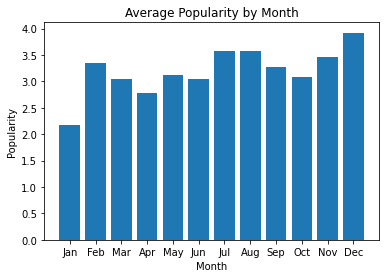

In [80]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig, ax = plt.subplots()
ax.bar(months, grouped_tmdb['popularity'].mean())
ax.set_title('Average Popularity by Month')
ax.set_xlabel('Month')
ax.set_ylabel('Popularity');

Another aspect to consider for a movie's release month is how many other movies are released during that month. This can provide some insight into how popular certain months are and how much competition a movie might have during its release.


In [81]:
month_count_dict = {'Jan':0, 'Feb':0, 'Mar':0, 'Apr':0, 'May':0, 'Jun':0, 'Jul':0, 'Aug':0, 'Sep':0, 'Oct':0, 'Nov':0, 'Dec':0}

for month in budgets_recent['release_month']:
    month_count_dict[month] += 1
month_count_dict

{'Jan': 266,
 'Feb': 313,
 'Mar': 382,
 'Apr': 382,
 'May': 316,
 'Jun': 345,
 'Jul': 342,
 'Aug': 394,
 'Sep': 408,
 'Oct': 462,
 'Nov': 378,
 'Dec': 491}

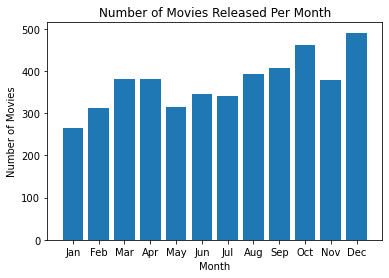

In [82]:
fig,ax = plt.subplots()

ax.bar(month_count_dict.keys(), month_count_dict.values())
ax.set_title('Number of Movies Released Per Month')
ax.set_xlabel('Month')
ax.set_ylabel("Number of Movies");


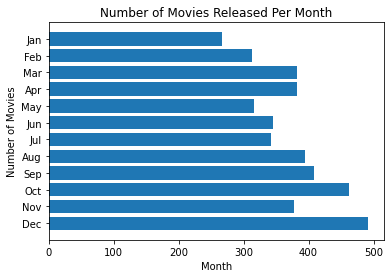

In [83]:
#same data as the graph above, just plotted horizontally
fig,ax = plt.subplots()

months = list(month_count_dict.keys())
movies_count = list(month_count_dict.values())

months.reverse()
movies_count.reverse()

ax.barh(months, movies_count)
ax.set_title('Number of Movies Released Per Month')
ax.set_xlabel('Month')
ax.set_ylabel("Number of Movies");

The following stacked bar chart takes our budget/gross dataset and plots the mean gross values grouped by month.

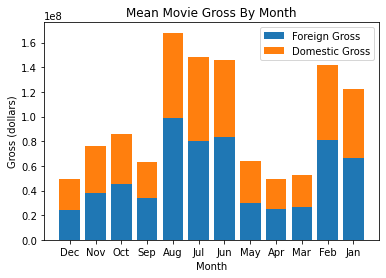

In [84]:
#plotting foreign and domestic growth by month as a stacked bar chart
domestic_gross_mean = budgets_month['domestic_gross'].mean()
foreign_gross_mean = budgets_month['foreign_gross'].mean()

fig, ax = plt.subplots()

ax.bar(months, foreign_gross_mean, label='Foreign Gross')
ax.bar(months, domestic_gross_mean, bottom=foreign_gross_mean, label='Domestic Gross')

ax.set_title("Mean Movie Gross By Month")
ax.set_xlabel("Month")
ax.set_ylabel("Gross (dollars)")

ax.legend();


Graphing the same data limited to movies released in the past 25 years revels very similar trends.

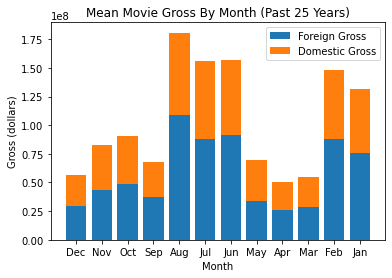

In [85]:
domestic_gross_mean = budgets_recent_grouped['domestic_gross'].mean()
foreign_gross_mean = budgets_recent_grouped['foreign_gross'].mean()

fig, ax = plt.subplots()

ax.bar(months, foreign_gross_mean, label='Foreign Gross')
ax.bar(months, domestic_gross_mean, bottom=foreign_gross_mean, label='Domestic Gross')

ax.set_title("Mean Movie Gross By Month (Past 25 Years)")
ax.set_xlabel("Month")
ax.set_ylabel("Gross (dollars)")

ax.legend();

This indicates that the mean movie gross is weighted heavily by releases from the past 25 years.

We also graphed the median movie gross grouped by month. Using the median reduces the effect of super-performer movies such as "Avatar". This can give us a better look at how a movie might perform in a given release window.

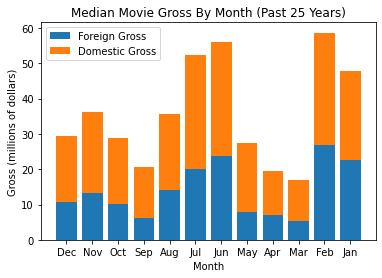

In [86]:
#median movie data from the past 25 years 
#plotted as a stacked bar chart of foreign and domestic gross

domestic_gross_median = budgets_recent_grouped['domestic_gross'].median()
foreign_gross_median = budgets_recent_grouped['foreign_gross'].median()

fig, ax = plt.subplots()

ax.bar(months, foreign_gross_median, label='Foreign Gross')
ax.bar(months, domestic_gross_median, bottom=foreign_gross_median, label='Domestic Gross')

ax.set_title("Median Movie Gross By Month (Past 25 Years)")
ax.set_xlabel("Month")
ax.set_ylabel("Gross (millions of dollars)")

#function to format y-axis out of scientific notation
def format_number(data_value, idx):
    formatter = '{:1.0f}'.format(data_value*0.000001)
    return formatter
plt.yticks(np.arange(0, 70_000_000, 10_000_000))
ax.yaxis.set_major_formatter(format_number)

ax.legend();



May is most strongly affected by using the median instead of the mean. This indicates that May had some outlier movies with high gross. The median could be a better metric for a fledgling movie studio.

### Budget

To better narrow down my data i only took data from movies with a budget between 50 million and 250 million

In [87]:
budgets_fix = budgets_clean.query('50000000 <= production_budget <= 250000000')
budgets_fix

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,release_month,month_number,release_year
988,89,"Dec 15, 1978",Superman,55000000.0,134218018.0,300200000.0,165981982.0,Dec,12,1978
1048,49,"Jun 19, 1981",Superman II,54000000.0,108185706.0,108185706.0,0.0,Jun,6,1981
695,96,"Jun 22, 1988",Who Framed Roger Rabbit?,70000000.0,154112492.0,351500000.0,197387508.0,Jun,6,1988
958,59,"May 25, 1988",Rambo III,58000000.0,53715611.0,188715611.0,135000000.0,May,5,1988
722,23,"Aug 9, 1989",The Abyss,70000000.0,54243125.0,54243125.0,0.0,Aug,8,1989
...,...,...,...,...,...,...,...,...,...,...
124,25,"May 31, 2019",Godzilla: King of the Monsters,170000000.0,85576941.0,299276941.0,213700000.0,May,5,2019
619,20,"Jan 22, 2019",Renegades,77500000.0,0.0,1521672.0,1521672.0,Jan,1,2019
580,81,"Jun 7, 2019",The Secret Life of Pets 2,80000000.0,63795655.0,113351496.0,49555841.0,Jun,6,2019
1176,77,"Apr 12, 2019",Hellboy,50000000.0,21903748.0,40725492.0,18821744.0,Apr,4,2019


I wanted to seperate my data by years so as to show the change of trends between production budget and gross revenues for both old movies before 2005 and newer movies 2005 onwards.

In [88]:
budgets_new = budgets_fix[budgets_fix['release_year'] >= 2005]
budgets_new

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,release_month,month_number,release_year
532,33,"May 27, 2005",The Longest Yard,82000000.0,158119460.0,191558505.0,33439045.0,May,5,2005
550,51,"Mar 11, 2005",Robots,80000000.0,128200012.0,260700012.0,132500000.0,Mar,3,2005
1151,52,"Jun 10, 2005",The Adventures of Sharkboy and Lavagirl in 3-D,50000000.0,39177684.0,69425966.0,30248282.0,Jun,6,2005
581,82,"Jun 24, 2005",Bewitched,80000000.0,63313159.0,131159306.0,67846147.0,Jun,6,2005
585,86,"Oct 28, 2005",The Legend of Zorro,80000000.0,45575336.0,141475336.0,95900000.0,Oct,10,2005
...,...,...,...,...,...,...,...,...,...,...
124,25,"May 31, 2019",Godzilla: King of the Monsters,170000000.0,85576941.0,299276941.0,213700000.0,May,5,2019
619,20,"Jan 22, 2019",Renegades,77500000.0,0.0,1521672.0,1521672.0,Jan,1,2019
580,81,"Jun 7, 2019",The Secret Life of Pets 2,80000000.0,63795655.0,113351496.0,49555841.0,Jun,6,2019
1176,77,"Apr 12, 2019",Hellboy,50000000.0,21903748.0,40725492.0,18821744.0,Apr,4,2019


In [89]:
budgets_old = budgets_fix[budgets_fix['release_year'] < 2005]
budgets_old

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,release_month,month_number,release_year
988,89,"Dec 15, 1978",Superman,55000000.0,134218018.0,300200000.0,165981982.0,Dec,12,1978
1048,49,"Jun 19, 1981",Superman II,54000000.0,108185706.0,108185706.0,0.0,Jun,6,1981
695,96,"Jun 22, 1988",Who Framed Roger Rabbit?,70000000.0,154112492.0,351500000.0,197387508.0,Jun,6,1988
958,59,"May 25, 1988",Rambo III,58000000.0,53715611.0,188715611.0,135000000.0,May,5,1988
722,23,"Aug 9, 1989",The Abyss,70000000.0,54243125.0,54243125.0,0.0,Aug,8,1989
...,...,...,...,...,...,...,...,...,...,...
657,58,"Dec 17, 2004",Spanglish,75000000.0,42044321.0,54344321.0,12300000.0,Dec,12,2004
326,27,"Dec 17, 2004",The Aviator,110000000.0,102608827.0,208370892.0,105762065.0,Dec,12,2004
269,70,"May 28, 2004",The Day After Tomorrow,125000000.0,186740799.0,556319450.0,369578651.0,May,5,2004
340,41,"Jun 16, 2004",Around the World in 80 Days,110000000.0,24004159.0,72004159.0,48000000.0,Jun,6,2004


In [90]:
#making sure that everything looks correct
budgets_fix.describe()

,id,production_budget,domestic_gross,worldwide_gross,foreign_gross,month_number,release_year
count,1181.000000,1.181000e+03,1.181000e+03,1.181000e+03,1.181000e+03,1181.000000,1181.000000
mean,50.752752,9.291470e+07,1.081847e+08,2.699648e+08,1.617802e+08,7.145639,2007.070279
std,28.784262,4.402178e+07,9.728462e+07,2.639911e+08,1.777321e+08,3.367963,7.065023
min,1.000000,5.000000e+07,0.000000e+00,5.162790e+05,0.000000e+00,1.000000,1978.000000
25%,26.000000,6.000000e+07,4.147610e+07,8.989593e+07,4.194300e+07,5.000000,2002.000000
50%,51.000000,7.900000e+07,7.812020e+07,1.833534e+08,1.032547e+08,7.000000,2007.000000
75%,76.000000,1.120000e+08,1.404647e+08,3.515000e+08,2.139614e+08,11.000000,2013.000000
max,100.000000,2.500000e+08,7.000596e+08,2.208208e+09,1.548844e+09,12.000000,2019.000000


I wanted to show the relationship between new domestic gross and production budgets so to do that i first formatted my data
so that the x and y scales werent based off exponenents by running a formatter and changing the x and y ticks to be more
accurate to the data being shown. Then i plotted a scatter plot with the x value being budget and y value being gross.
I added a third element to the scatter plot to further seperate the data, movies that were newer than 2012 were colored
orange and anything before was colored blue. The domestic values wont be presented because they dont get our point across as well as worldwide gross.

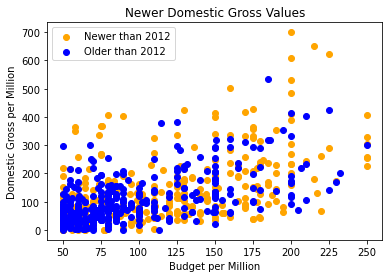

In [91]:
new_domestic, ax = plt.subplots()

x = budgets_new['production_budget']
y = budgets_new['domestic_gross']

plt.title('Newer Domestic Gross Values')
plt.xlabel('Budget per Million')
plt.ylabel('Domestic Gross per Million')

def format_number(data_value, idx):
    formatter = '{:1.0f}'.format(data_value*0.000001)
    return formatter

def format_numbery(data_value, idx):
    formatter = '{:1.0f}'.format(data_value*0.000001)
    return formatter

plt.xticks(np.arange(0,250_000_001, 25_000_000))
ax.xaxis.set_major_formatter(format_number)

plt.yticks(np.arange(0,2_000_000_001, 100_000_000))
ax.yaxis.set_major_formatter(format_numbery)
           
ax.scatter(x[budgets_new['release_year'] >= 2012], y[budgets_new['release_year'] >= 2012], color='orange', label='Newer than 2012');
ax.scatter(x[budgets_new['release_year'] < 2012], y[budgets_new['release_year'] < 2012], color='blue', label='Older than 2012');

ax.legend()
plt.savefig('new_domestic.png', dpi = 400)

Same concept as the above graph except this is working with older movies, and the color seperation is before and after 1995.

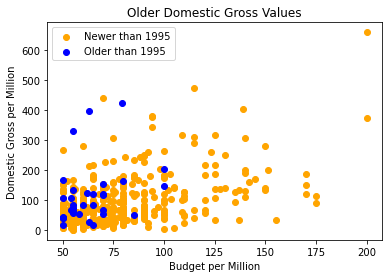

In [92]:
old_domestic, ax = plt.subplots()

plt.title('Older Domestic Gross Values')
plt.xlabel('Budget per Million')
plt.ylabel('Domestic Gross per Million')

plt.xticks(np.arange(0,250_000_001, 25_000_000))
ax.xaxis.set_major_formatter(format_number)

plt.yticks(np.arange(0,2_000_000_001, 100_000_000))
ax.yaxis.set_major_formatter(format_numbery)

x = budgets_old['production_budget']
y = budgets_old['domestic_gross']

ax.scatter(x[budgets_old['release_year'] >= 1995], y[budgets_old['release_year'] >= 1995], color='orange', label='Newer than 1995');
ax.scatter(x[budgets_old['release_year'] < 1995], y[budgets_old['release_year'] < 1995], color='blue', label='Older than 1995');

ax.legend()
plt.savefig('old_domestic.png', dpi = 400)

Similar to the above graphs but i am now working with worldwide gross instead of domestic gross. for the next two graphs which i will be focusing my presentation about i made a line to show the fact that many movies past the 150 million budget mark far make more profit than budget so their ROI is much more profitable the more they spend.

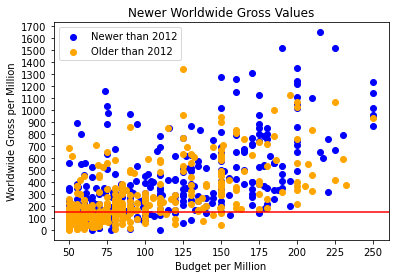

In [93]:
new_worldwide, ax = plt.subplots()

plt.title('Newer Worldwide Gross Values')
plt.xlabel('Budget per Million')
plt.ylabel('Worldwide Gross per Million')

plt.xticks(np.arange(0,250_000_001, 25_000_000))
ax.xaxis.set_major_formatter(format_number)

plt.yticks(np.arange(0,2_000_000_001, 100_000_000))
ax.yaxis.set_major_formatter(format_numbery)

plt.axhline(y = 150_000_000, color = 'r', linestyle = '-')

x = budgets_new['production_budget']
y = budgets_new['worldwide_gross']

ax.scatter(x[budgets_new['release_year'] >= 2012], y[budgets_new['release_year'] >= 2012], color='blue',label='Newer than 2012');
ax.scatter(x[budgets_new['release_year'] < 2012], y[budgets_new['release_year'] < 2012], color='orange', label='Older than 2012');

ax.legend()
plt.savefig('new_worldwide.png', dpi = 400)

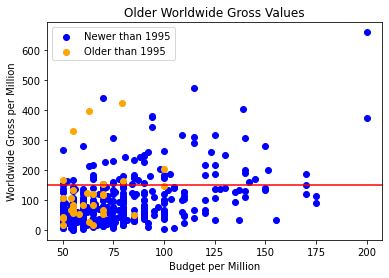

In [94]:
old_worldwide, ax = plt.subplots()

plt.title('Older Worldwide Gross Values')
plt.xlabel('Budget per Million')
plt.ylabel('Worldwide Gross per Million')

plt.xticks(np.arange(0,250_000_001, 25_000_000))
ax.xaxis.set_major_formatter(format_number)

plt.yticks(np.arange(0,2_000_000_001, 100_000_000))
ax.yaxis.set_major_formatter(format_numbery)

plt.axhline(y = 150_000_000, color = 'r', linestyle = '-')

x = budgets_old['production_budget']
y = budgets_old['domestic_gross']

ax.scatter(x[budgets_old['release_year'] >= 1995], y[budgets_old['release_year'] >= 1995], color='blue', label='Newer than 1995');
ax.scatter(x[budgets_old['release_year'] < 1995], y[budgets_old['release_year'] < 1995], color='orange', label='Older than 1995');

ax.legend()
plt.savefig('old_worldwide.png', dpi = 400)

For the next two lines of code i wanted to show examples that could be good starting points for microsoft if they did want to a documentary style films, while not necessarily full documentarys these two films are dramatizations of documentary biographies and could be relevant if microsoft wanted to do a similar style for a documentary about Bill Gates.
so to show this i first isolated the two movies into seperate variables and then made even further variables in which
i would use to make seperations within my bar graph below. Ended up not using the steve jobs data for presentation

In [95]:
sj = budgets_clean[budgets_clean['movie'] == "Steve Jobs"]
sj_budget = sj['production_budget']
sj_domestic = sj['domestic_gross']
sj_world = sj['worldwide_gross']
sj

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,release_month,month_number,release_year
1959,60,"Oct 9, 2015",Steve Jobs,30000000.0,17766658.0,35579007.0,17812349.0,Oct,10,2015


wanted to clean up the data in sn specifically so that i could use that data for a clear side by side bar chart

In [109]:
sn = budgets[budgets['movie'] == "The Social Network"]
sn

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,release_month
1390,91,"Oct 1, 2010",The Social Network,40000000.0,96962694.0,224922135.0,127959441.0,Oct


In order to achieve this comparison i first made the variable The Social Network.
after setting the x variable i assigned a stacked bar chart for each and used the seperated variables within the data for each statistic i was looking at within the movie to show a clean bar chart which illustrated the budget and worldwide gross for the movie. A legend to show what each color represents helps differentiate.

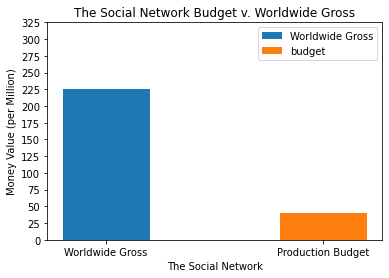

In [108]:
x = ['Worldwide Gross']
x2 = ['Production Budget']

Tech_movies, ax = plt.subplots()
width = .8

ax.bar(x, sn['worldwide_gross'], width=0.4, label = 'Worldwide Gross')
ax.bar(x2, sn['production_budget'], width=0.4, label = 'budget')


ax.legend()
plt.yticks(np.arange(0,325_000_001, 25_000_000))
ax.yaxis.set_major_formatter(format_numbery)

plt.title('The Social Network Budget v. Worldwide Gross');
plt.xlabel('The Social Network');
plt.ylabel('Money Value (per Million)');
plt.savefig('Tech_movies.png', dpi = 400)

### Genre Popularity

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

ax.bar(x=bottom_genre_counts_df['Genre'], height=bottom_genre_counts_df[0], color=['green', 'green', 'green', 'green', 'green', 'green', 'green', 'blue', 'green', 'green', 'green', 'green', 'green', 'green'])
plt.xticks(rotation = 90)
plt.title('Lowest Rated Movies by Genre')
plt.xlabel('Movie Genre')
plt.ylabel('Number of Movies');

plt.savefig('lowest_genre_graph.png', bbox_inches = "tight", dpi=300)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x=top_genre_counts_df['Genre'], height=top_genre_counts_df[0], color=['blue', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green'])
plt.xticks(rotation = 90)
plt.title('Highest Rated Movies by Genre')
plt.xlabel('Movie Genre')
plt.ylabel('Number of Movies');

plt.savefig('highest_genre_graph.png', bbox_inches = "tight", dpi=300)


I plotted the movie counts for the 50 top rated movies to show that Documentary was the genre with the highest movie count. I also plotted the movie countws for the 50 lowest reated movies to show that Documentaries were not as common in the lowest rated movies.

## Conclusion

Given our analysis, we recommend producing Documentaries $150-$200 million budget. If we are looking to producde a Blockbuster, we should look to release our films in June, July, August, November, and December. If we are not looking to compete with Blockbusters, we recommend releasing in the "off months."
